# Lab 2: Regularization and Cross-Validation

## Team K

Chouliaras Andreas <br>
Pappas Apostolos  <br>
Stylianos Gkountouvas <br>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import xlrd 

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")
sns.set_context("poster")

C:\Users\Admin\.conda\envs\ml\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Admin\.conda\envs\ml\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Admin\.conda\envs\ml\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Admin\.conda\envs\ml\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Admin\.conda\envs\ml\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.le

In [2]:
df=pd.read_csv("./kc_house_data.csv", delimiter= ";")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,"47,5112","-122,257",1340,5650
1,6414100192,20141209T000000,538000,3,"2,25",2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,"47,721","-122,319",1690,7639
2,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,"47,7379","-122,233",2720,8062
3,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,"47,5208","-122,393",1360,5000
4,1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,"47,6168","-122,045",1800,7503


In [3]:
# Convert f, x, y to numpy array
y = df.price.values
x = df.sqft_living.values #+ df.sqft_lot.values + df.sqft_above.values + df.sqft_basement.values


df.shape

(21613, 21)

In [4]:
indexes=np.sort(np.random.choice(x.shape[0], size=300, replace=False)) # Using sort to make plotting easier later
indexes

array([   65,   331,   391,   421,   583,   603,   612,   708,   746,
         816,   836,   973,  1032,  1062,  1088,  1119,  1253,  1264,
        1412,  1540,  1604,  1610,  1617,  1666,  1682,  1692,  1745,
        1776,  1809,  1821,  1981,  2002,  2011,  2034,  2189,  2297,
        2307,  2399,  2439,  2456,  2482,  2603,  2606,  2677,  2758,
        3047,  3137,  3169,  3172,  3176,  3488,  3562,  3614,  3633,
        3779,  3859,  3924,  3962,  3987,  4126,  4275,  4322,  4349,
        4358,  4389,  4473,  4476,  4479,  4617,  4868,  4877,  5013,
        5022,  5057,  5137,  5185,  5326,  5365,  5376,  5435,  5510,
        5588,  5591,  5618,  5655,  5735,  5768,  5910,  6132,  6235,
        6285,  6304,  6426,  6431,  6437,  6628,  6671,  6735,  7036,
        7082,  7292,  7339,  7416,  7569,  7720,  7740,  7903,  7924,
        7929,  7934,  7938,  7988,  7989,  7998,  8071,  8114,  8238,
        8344,  8349,  8389,  8437,  8522,  8552,  8646,  8725,  8794,
        8931,  8962,

In [5]:
# Create a new dataframe from the random points
sample_df = pd.DataFrame(dict(x=x[indexes],y=y[indexes]), dtype = "float64" ) # New dataframe
sample_df.head()

,x,y
0,2770.0,317625
1,2240.0,279000
2,1980.0,490000
3,1600.0,625000
4,2060.0,439000


In [6]:
from sklearn.model_selection import train_test_split

datasize=sample_df.shape[0]

#split dataset using the index, as we have x, f, and y that we want to split.
itrain, itest = train_test_split(np.arange(60), train_size=0.8)

xtrain = sample_df.x[itrain].values
ytrain = sample_df.y[itrain].values

xtest= sample_df.x[itest].values
ytest = sample_df.y[itest].values

C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
type(ytrain[1])

str

In [8]:
from sklearn.linear_model import LinearRegression

for i in range(ytrain.size):
    if(type(ytrain[i]) != float):
        ytrain[i] = float(ytrain[i].replace(",","."))

# fit the model to training data
simp_reg = LinearRegression().fit(xtrain.reshape(-1,1), (ytrain))

# save the beta coefficients
beta0_sreg = simp_reg.intercept_
beta1_sreg = simp_reg.coef_[0]

print("(beta0, beta1) = ({0:8.6f}, {1:8.6f})".format(beta0_sreg, beta1_sreg))

(beta0, beta1) = (96411.381804, 187.604501)


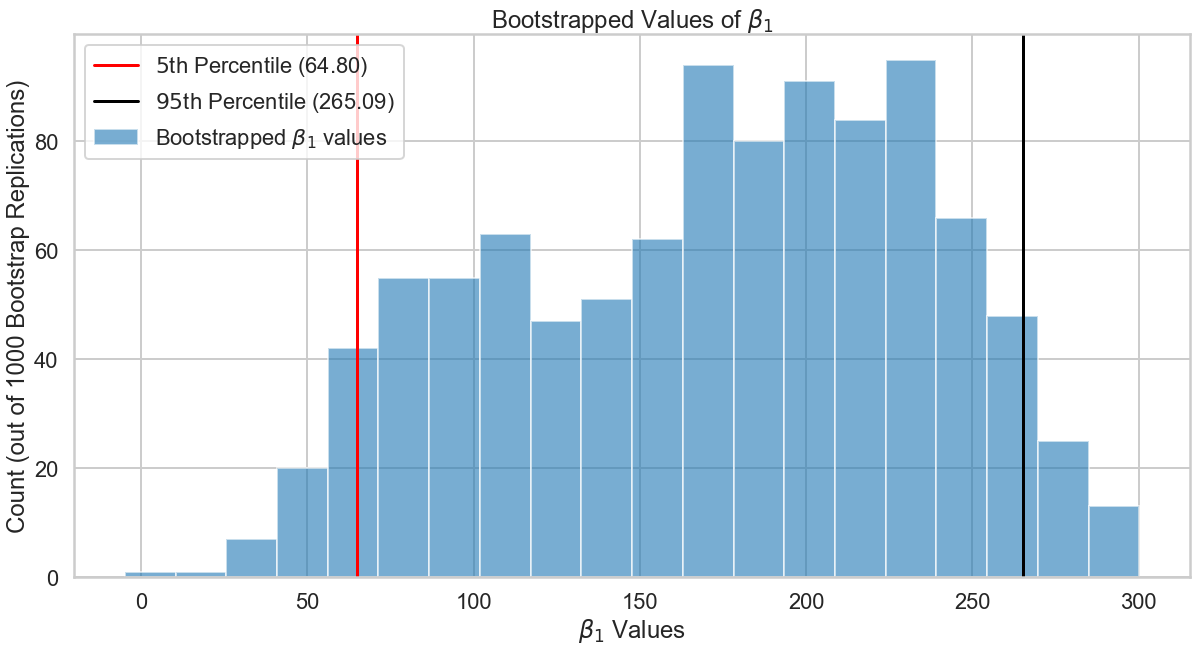

In [9]:
N = 1000
bootstrap_beta1s = np.zeros(N)
for cur_bootstrap_rep in range(N):
    # select indices that are in the resample (easiest way to be sure we grab y values that match the x values)
    inds_to_sample = np.random.choice(xtrain.shape[0], size=xtrain.shape[0], replace=True)
    
    # take the sample
    x_train_resample = xtrain[inds_to_sample]
    y_train_resample = ytrain[inds_to_sample]
    
    # fit the model
    bootstrap_model = LinearRegression().fit(x_train_resample.reshape(-1,1), y_train_resample)
    
    # extract the beta1 and append
    bootstrap_beta1s[cur_bootstrap_rep] = bootstrap_model.coef_[0]

## display the results

# calculate 5th and 95th percentiles
lower_limit, upper_limit = np.percentile(bootstrap_beta1s,[5,95])

# plot histogram and bounds
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.hist(bootstrap_beta1s, 20, alpha=0.6, label=r"Bootstrapped $\beta_{1}$ values")
ax.axvline(lower_limit, color='red', label=r"$5$th Percentile ({:.2f})".format(lower_limit))
ax.axvline(upper_limit, color='black', label=r"$95$th Percentile ({:.2f})".format(upper_limit))

# good plots have labels
ax.set_xlabel(r"$\beta_{1}$ Values")
ax.set_ylabel("Count (out of 1000 Bootstrap Replications)")
plt.title(r"Bootstrapped Values of $\beta_{1}$")
plt.legend();

In [10]:
regression_coeffs = dict() # Store regression coefficients from each model in a dictionary

regression_coeffs['OLS'] = [np.nan]*2 # Initialize to NaN
regression_coeffs[r'Ridge $\lambda = 0$'] = [np.nan]*2

dfResults = pd.DataFrame(regression_coeffs) # Create dataframe

dfResults.rename({0: r'$\beta_{0}$', 1: r'$\beta_{1}$'}, inplace=True) # Rename rows
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,NaN,NaN
$\beta_{1}$,NaN,NaN


In [11]:
simp_reg = LinearRegression() # build the the ordinary least squares model

simp_reg.fit(xtrain.reshape(-1,1), ytrain) # fit the model to training data

# save the beta coefficients
beta0_sreg = simp_reg.intercept_
beta1_sreg = simp_reg.coef_[0]

dfResults['OLS'][:] = [beta0_sreg, beta1_sreg]
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,96411.381804,NaN
$\beta_{1}$,187.604501,NaN


In [12]:
#y_predict = lambda x : beta0_sreg + beta1_sreg*x # make predictions
ypredict_ols = simp_reg.predict(x.reshape(-1,1))
ypredict_ols.shape

(21613,)

In [13]:
from sklearn.linear_model import Ridge 

In [14]:
ridge_reg = Ridge(alpha = 0) # build the ridge regression model with specified lambda, i.e. alpha

ridge_reg.fit(xtrain.reshape(-1,1), ytrain) # fit the model to training data

# save the beta coefficients
beta0_ridge = ridge_reg.intercept_
beta1_ridge = ridge_reg.coef_[0]

ypredict_ridge = ridge_reg.predict(x.reshape(-1,1)) # make predictions everywhere

dfResults[r'Ridge $\lambda = 0$'][:] = [beta0_ridge, beta1_ridge]
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,96411.381804,96411.381804
$\beta_{1}$,187.604501,187.604501


In [15]:
for i in range(y.size):
    if(type(y[i]) != float):
        y[i] = float(y[i].replace(",","."))

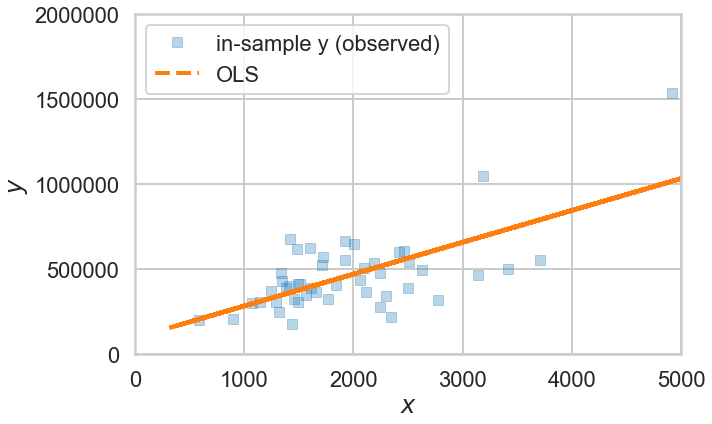

In [59]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(xtrain, ytrain, 's', alpha=0.3, ms=10, label="in-sample y (observed)") # plot in-sample training data
#ax.plot(x[0:300], y[0:300], '.', alpha=0.3, label="population y") # plot population data

#ax.plot(x, f, ls='-',  alpha=0.4, lw=4, label="True function")
ax.plot(x, ypredict_ols, ls='--', lw=4, label="OLS") # plot simple linear regression fit
#ax.plot(x, ypredict_ridge, ls='-.', lw = 4, label="Ridge") # plot ridge regression fit

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim((0, 5000))
ax.set_ylim((0, 2000000))

ax.legend();

fig.tight_layout()

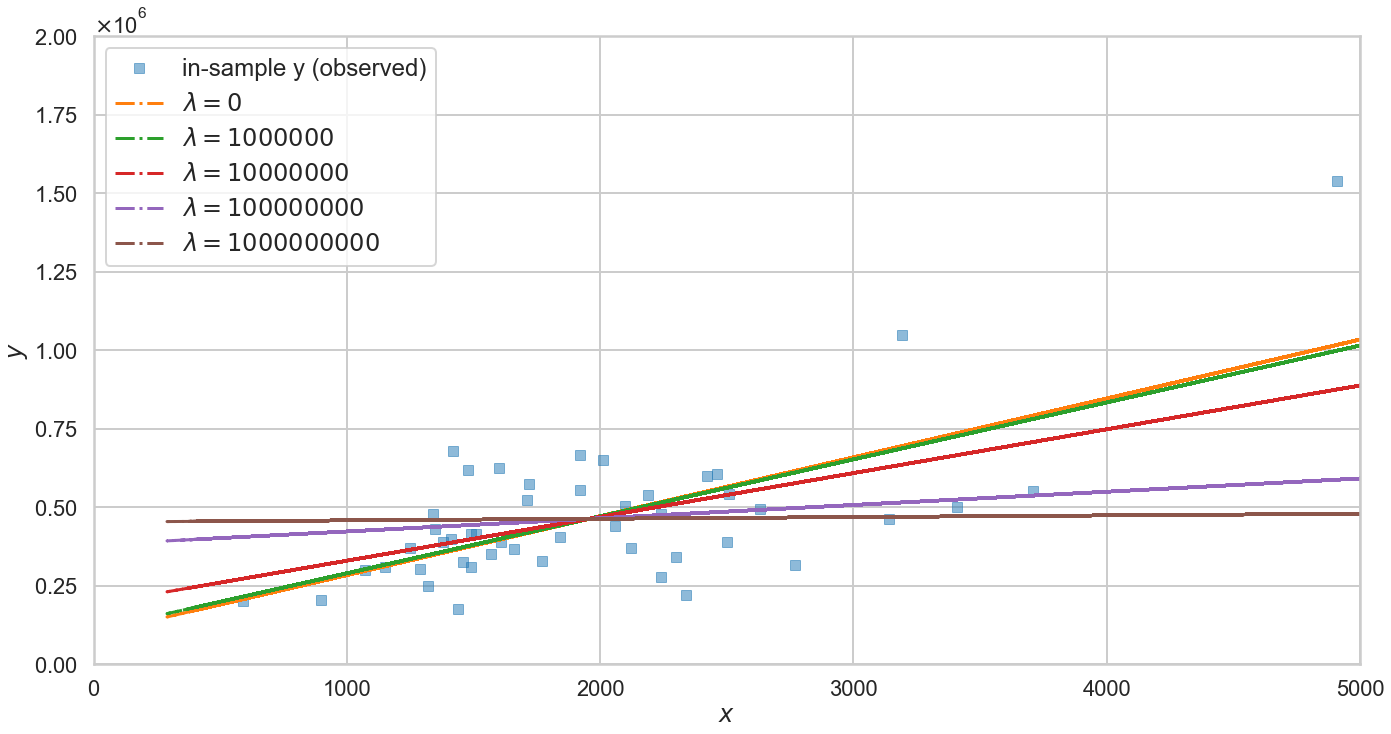

In [58]:
# Your code here
fig, ax = plt.subplots(1,1, figsize=(20,10))

pen_params= [0, 10**6, 10**7, 10**8, 10**9]

ax.plot(xtrain, ytrain, 's', alpha=0.5, ms=10, label="in-sample y (observed)") # plot in-sample training data

for alpha in pen_params:
    ridge_reg = Ridge(alpha = alpha) # build the ridge regression model with specified lambda, i.e. alpha
    ridge_reg.fit(xtrain.reshape(-1,1), ytrain) # fit the model to training data
    ypredict_ridge = ridge_reg.predict(x.reshape(-1,1))
    ax.plot(x, ypredict_ridge, ls='-.', lw = 3, label=r"$\lambda = {}$".format(alpha)) # plot ridge regression fit

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim((0, 5000))
ax.set_ylim((0, 2000000))

ax.legend(fontsize=24);

fig.tight_layout()

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 


#fig.savefig('ridge_lambda.png')

In [50]:
ridge_reg = Ridge(alpha = 100)# build the ridge regression model with specified lambda, i.e. alpha
ridge_reg.fit(xtrain.reshape(-1,1), ytrain) # fit the model to training data
ypredict_ridge = ridge_reg.predict(x.reshape(-1,1))

print(ypredict_ridge)

[317785.19471212 578554.55234044 240867.61440449 ... 287768.5780067
 396578.81356384 287768.5780067 ]


In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
# your code here
toy = np.array([0, 2, 5])
PolynomialFeatures(4).fit_transform(toy.reshape(-1,1))

array([[  1.,   0.,   0.,   0.,   0.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   5.,  25., 125., 625.]])

C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.90324e-56): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.90021e-55): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.9175e-54): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.9175e-53): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.9175e-52): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-pack

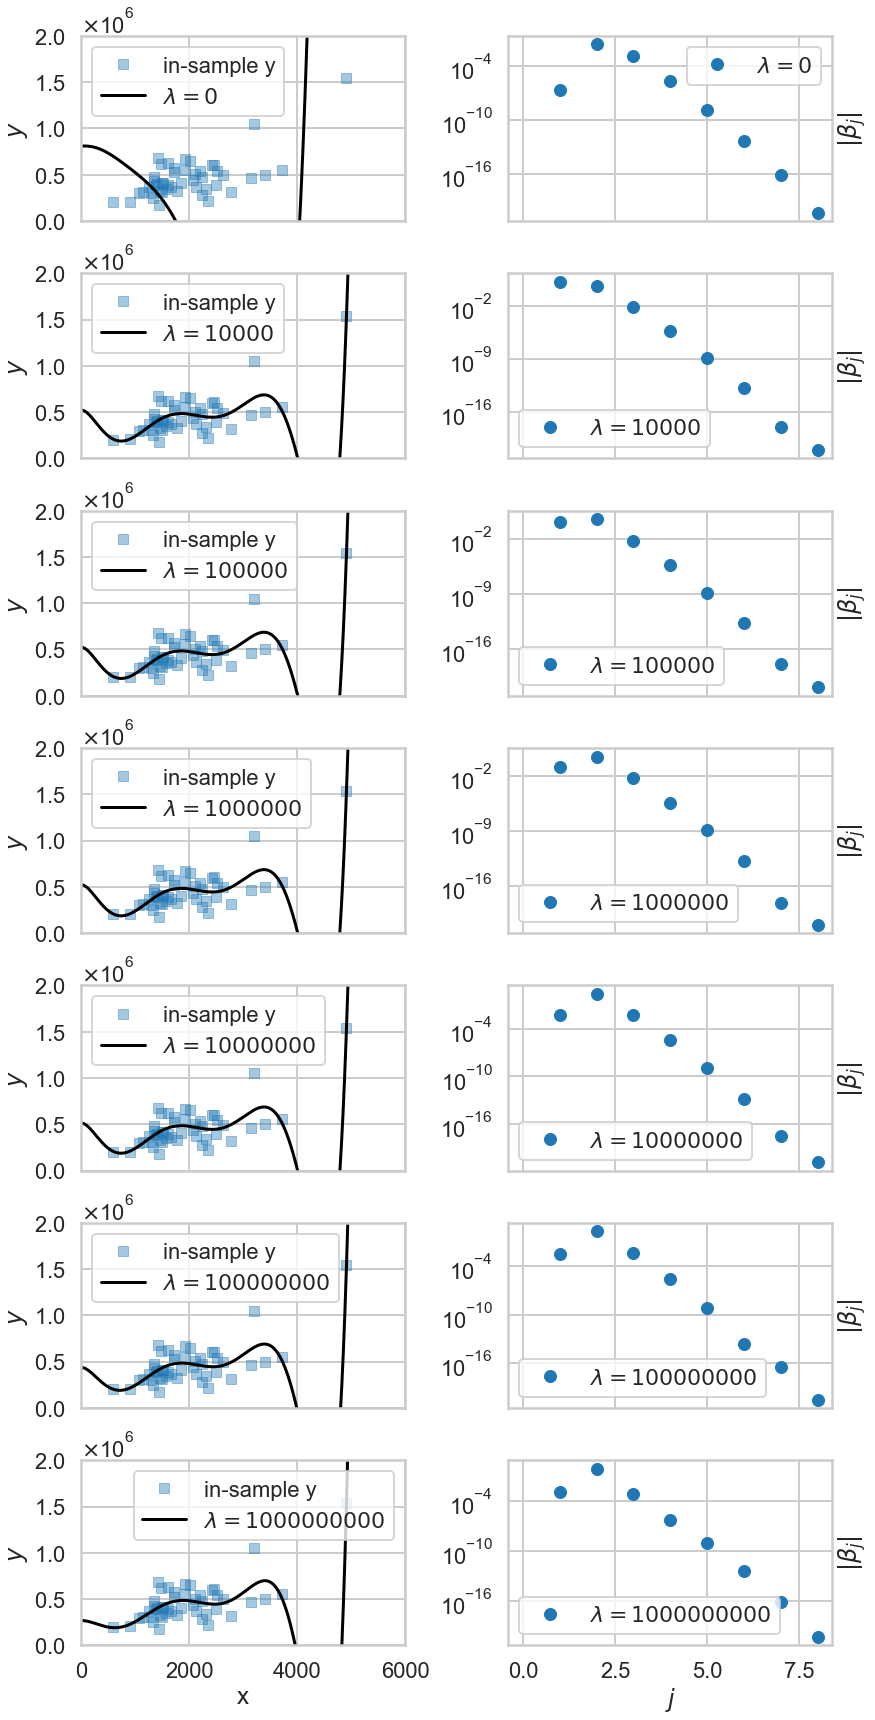

In [231]:
from matplotlib import ticker
d = 8 # Maximum polynomial degree
# You will create a grid of plots of this size (7 x 2)
rows = 7
cols = 2
lambdas = [0, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9] # Various penalization parameters to try
grid_to_predict = np.arange(0, 6000, 1) # Predictions will be made on this grid

# Create training set and test set
Xtrain = PolynomialFeatures(d).fit_transform(xtrain.reshape(-1,1))
test_set = PolynomialFeatures(d).fit_transform(grid_to_predict.reshape(-1,1))

fig, axs = plt.subplots(rows, cols, sharex='col', figsize=(12, 24)) # Set up plotting objects

for i, lam in enumerate(lambdas):
    # your code here
    ridge_reg = Ridge(alpha = lam) # Create regression object
    ridge_reg.fit(Xtrain, ytrain) # Fit on regression object
    ypredict_ridge = ridge_reg.predict(test_set) # Do a prediction on the test set
    
    ### Provided code
    axs[i,0].plot(xtrain, ytrain, 's', alpha=0.4, ms=10, label="in-sample y") # Plot sample observations
    axs[i,0].plot(grid_to_predict, ypredict_ridge, 'k-', label=r"$\lambda =  {0}$".format(lam)) # Ridge regression prediction
    axs[i,0].set_ylabel('$y$') # y axis label
    axs[i,0].set_xlim((0, 6000)) # y axis limits
    axs[i,0].set_ylim((0, 2*10**6)) # x axis limits
    axs[i,0].legend(loc='best') # legend
    
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((-1,1)) 
    axs[i,0].yaxis.set_major_formatter(formatter) 
    
    coef = ridge_reg.coef_.ravel() # Unpack the coefficients from the regression
    
    axs[i,1].semilogy(np.abs(coef), ls=' ', marker='o', label=r"$\lambda =  {0}$".format(lam)) # plot coefficients
    #axs[i,1].set_ylim((1e-04, 1e+15)) # Set y axis limits
    #axs[i,1].set_xlim(1, 20) # Set y axis limits
    axs[i,1].yaxis.set_label_position("right") # Move y-axis label to right
    axs[i,1].set_ylabel(r'$\left|\beta_{j}\right|$') # Label y-axis
    axs[i,1].legend() # Legend

# Label x axes
axs[-1, 0].set_xlabel("x")
axs[-1, 1].set_xlabel(r"$j$");
plt.tight_layout()

In [232]:
from sklearn.model_selection import GridSearchCV
def cv_optimize_ridge(x: np.ndarray, y: np.ndarray, list_of_lambdas: list, n_folds: int =4):
    est = Ridge()
    parameters = {'alpha': list_of_lambdas}
    # the scoring parameter below is the default one in ridge, but you can use a different one
    # in the cross-validation phase if you want.
    gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, scoring="neg_mean_squared_error")
    gs.fit(x, y)
    return gs

In [233]:
lambs = [1.0, 10e1, 10e2, 10e3, 10e4, 10e5, 10e6, 10e7, 10e8, 10e9 ]
# your code here
fitmodel = cv_optimize_ridge(Xtrain, ytrain, lambs, n_folds=4)

C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.00867e-60): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.39e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.04197e-60): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.00601e-60): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.00867e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-pack

In [234]:
print(fitmodel.best_estimator_, "\n")
print(fitmodel.best_params_, "\n")
print(fitmodel.best_score_, "\n")

Ridge(alpha=1000000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 1000000.0} 

-521074048983.31244 



In [235]:
fitmodel.cv_results_

C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Admin\.conda\envs\ml\lib\site-p

{'mean_fit_time': array([0.00124872, 0.00049859, 0.00074828, 0.00049877, 0.00099599,
        0.00074494, 0.00074768, 0.00049871, 0.00099754, 0.00024968]),
 'std_fit_time': array([4.30110107e-04, 4.98592861e-04, 4.32018100e-04, 4.98771667e-04,
        6.84805232e-07, 4.30115856e-04, 4.31673775e-04, 4.98712070e-04,
        6.07850494e-07, 4.32465126e-04]),
 'mean_score_time': array([0.00049621, 0.00024807, 0.00024927, 0.00049865, 0.00025004,
        0.        , 0.00024927, 0.00024939, 0.        , 0.00049865]),
 'std_score_time': array([0.00049622, 0.00042968, 0.00043174, 0.00049865, 0.00043308,
        0.        , 0.00043174, 0.00043195, 0.        , 0.00049865]),
 'param_alpha': masked_array(data=[1.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0,
                    10000000.0, 100000000.0, 1000000000.0, 10000000000.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param

In [236]:
fit_lambdas = [d['alpha'] for d in fitmodel.cv_results_['params']]
fit_scores = fitmodel.cv_results_['mean_test_score']

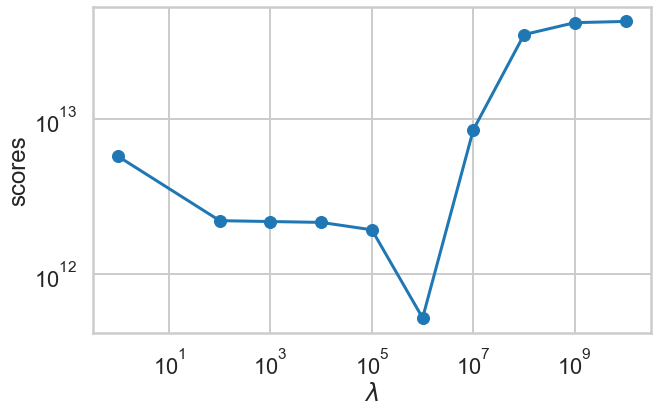

In [237]:
fig, ax2 = plt.subplots(1,1, figsize=(10,6))
ax2.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('$\lambda$')
ax2.set_ylabel('scores');

In [238]:
from sklearn.model_selection import cross_val_score

lr_object =  Ridge(alpha=0)
cross_val_score(lr_object, Xtrain, ytrain, cv=5)

array([-2.67064548e+01, -1.21993236e+03, -1.76741896e+00, -2.05088439e+02,
       -8.49585703e-01])

In [239]:
for cur_alpha in [10e1, 10e2, 10e3, 10e4, 10e5, 10e6]:
    lr_object =  Ridge(alpha=cur_alpha)
    scores = cross_val_score(lr_object, Xtrain, ytrain, cv=5)
    print("lambda {0}\t R^2 scores: {1}\t Mean R^2: {2}".format(cur_alpha,scores,np.mean(scores)))

lambda 100.0	 R^2 scores: [-2.86187025e-01 -1.78048647e+03 -8.79190156e-02 -5.79851794e+01
 -1.25028719e+00]	 Mean R^2: -368.0192091444236
lambda 1000.0	 R^2 scores: [-2.85198732e-01 -1.77317487e+03 -8.59637934e-02 -5.72526933e+01
 -1.23415632e+00]	 Mean R^2: -366.40657733503656
lambda 10000.0	 R^2 scores: [-2.85100614e-01 -1.76805399e+03 -8.57626355e-02 -5.71776711e+01
 -1.23250143e+00]	 Mean R^2: -365.3670059898344
lambda 100000.0	 R^2 scores: [-2.85036833e-01 -1.72534219e+03 -8.57396725e-02 -5.71498121e+01
 -1.23230230e+00]	 Mean R^2: -356.81901648694475
lambda 1000000.0	 R^2 scores: [-2.84486406e-01 -1.36294599e+03 -8.57101750e-02 -5.69258880e+01
 -1.23192591e+00]	 Mean R^2: -284.29480090501977
lambda 10000000.0	 R^2 scores: [-2.79413668e-01 -1.92577044e+02 -8.54546248e-02 -5.48494827e+01
 -1.22849556e+00]	 Mean R^2: -49.80397803020729


C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.98902e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.3506e-56): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.9885e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.02009e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.98092e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-pac

In [240]:
from sklearn.linear_model import RidgeCV

ridgeCV_object = RidgeCV(alphas=(10e1, 10e2, 10e3, 10e4, 10e5, 10e6), cv=5)
ridgeCV_object.fit(Xtrain, ytrain)
print("Best model searched:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(ridgeCV_object.alpha_,
                                                                            ridgeCV_object.intercept_,
                                                                            ridgeCV_object.coef_
                                                                            )
     )

Best model searched:
alpha = 10000000.0
intercept = 512750.7486214985
betas = [ 0.00000000e+00  7.30589543e-03 -3.06385777e+00  5.59959789e-03
 -3.87667600e-06  1.21878494e-09 -1.49601204e-13 -2.52174550e-18
  1.35229069e-21], 


C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.98902e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.3506e-56): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.9885e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.02009e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.98092e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-pac

In [241]:
# your code here
best_lambda = fitmodel.best_params_['alpha']
est = Ridge(alpha=best_lambda).fit(Xtrain,ytrain)
ypredict_ridge_best = est.predict(test_set)
est.coef_

C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.9175e-54): result may not be accurate.
  overwrite_a=True).T


array([ 0.00000000e+00,  1.27545758e-01, -3.16345181e+00,  5.80294606e-03,
       -4.05812358e-06,  1.30541899e-09, -1.72549127e-13,  6.51227705e-19,
        1.17406533e-21])

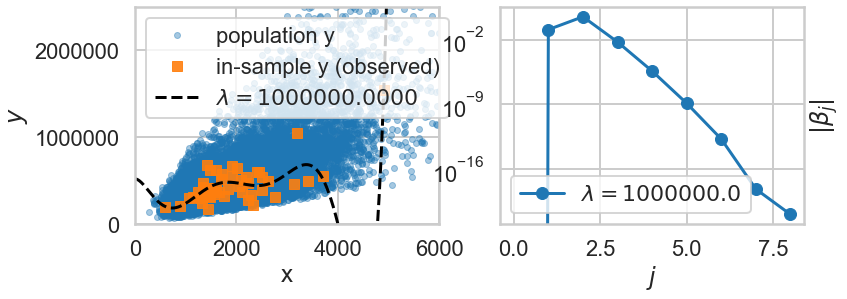

In [242]:
# code provided from here on
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
left = 0
right = 1

#axs[left].plot(x,f, lw=4, label='True Response')
axs[left].plot(x, y, '.', alpha=0.4, label="population y")
axs[left].plot(xtrain, ytrain, 's', alpha=0.9, ms=10, label="in-sample y (observed)")
axs[left].plot(grid_to_predict, ypredict_ridge_best, 'k--', label=r"$\lambda =  {{{0:1.4f}}}$".format(best_lambda))
axs[left].set_ylabel('$y$')
axs[left].set_ylim((0, 2.5*10**6))
axs[left].set_xlim((0, 6000))
axs[left].legend(loc=2)
coef = est.coef_.ravel()
axs[right].semilogy(np.abs(coef), marker='o', label=r"$\lambda =  {0}$".format(best_lambda))
axs[right].yaxis.set_label_position("right")
axs[right].set_ylabel(r'$\left|\beta_{j}\right|$')
axs[right].legend(loc='best')
axs[left].set_xlabel("x")
axs[right].set_xlabel(r'$j$');

In [243]:
#One more nice plot:
from sklearn.linear_model import Lasso 

ridge_coef = []
lasso_coef = []
for lamb in lambs:
    ridge_coef.append(Ridge(alpha=lamb).fit(Xtrain,ytrain).coef_)
    lasso_coef.append(Lasso(alpha=lamb).fit(Xtrain,ytrain).coef_)
ridge_coef[0:2]

C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.9175e-60): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.9175e-58): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sk

[array([ 0.00000000e+00,  2.79660700e+04, -5.86370464e+01,  6.44455758e-02,
        -4.04810293e-05,  1.49985888e-08, -3.23014447e-12,  3.72816185e-16,
        -1.77869313e-20]),
 array([ 0.00000000e+00,  1.28940895e+03, -5.73181796e+00,  8.52882532e-03,
        -5.75723427e-06,  1.94622563e-09, -3.16033603e-13,  1.81576982e-17,
         2.80324948e-22])]

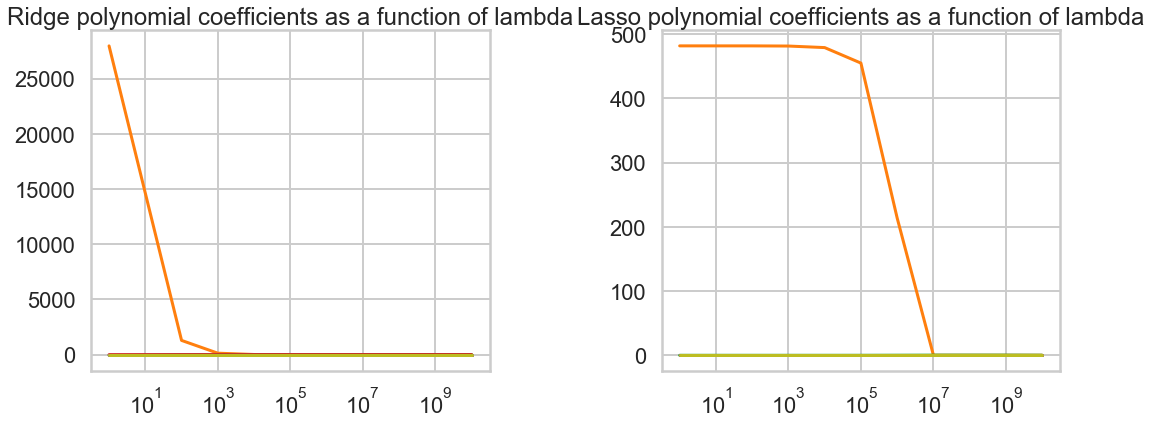

In [244]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
left = 0
right = 1
axs[left].plot(lambs,ridge_coef)
axs[left].set_xscale("log")
axs[left].set_title("Ridge polynomial coefficients as a function of lambda")
#axs[left].legend(loc='best')
axs[right].plot(lambs,lasso_coef)
axs[right].set_xscale("log")
axs[right].set_title("Lasso polynomial coefficients as a function of lambda")
plt.tight_layout()